In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Reef-world/MedicalCost-MLproject/main/MedicalCost.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       775 non-null    int64  
 1   sex       775 non-null    object 
 2   bmi       775 non-null    float64
 3   children  775 non-null    int64  
 4   smoker    775 non-null    object 
 5   region    775 non-null    object 
 6   charges   775 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 42.5+ KB


we can see here sex, smoker and region can be categorical data 

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

No null Values seen

In [6]:
df['sex'].value_counts()

sex
female    390
male      385
Name: count, dtype: int64

In [7]:
df['region'].value_counts()

region
southeast    217
northeast    192
southwest    187
northwest    179
Name: count, dtype: int64

In [8]:
df['smoker'].value_counts()

smoker
no     622
yes    153
Name: count, dtype: int64

above 4 can be called as categorical data


In [9]:
df.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [10]:
df.describe()

,age,bmi,children,charges
count,775.000000,775.000000,775.000000,775.000000
mean,39.663226,30.968645,1.074839,13297.241215
std,14.295294,5.981360,1.186520,12118.185350
min,18.000000,15.960000,0.000000,1136.399400
25%,27.000000,26.730000,0.000000,4752.353400
50%,40.000000,30.780000,1.000000,9504.310300
75%,52.000000,35.200000,2.000000,16582.138605
max,64.000000,49.060000,5.000000,63770.428010


we will use Univariate analysis using count plot on all categorical column

<Axes: xlabel='sex', ylabel='count'>

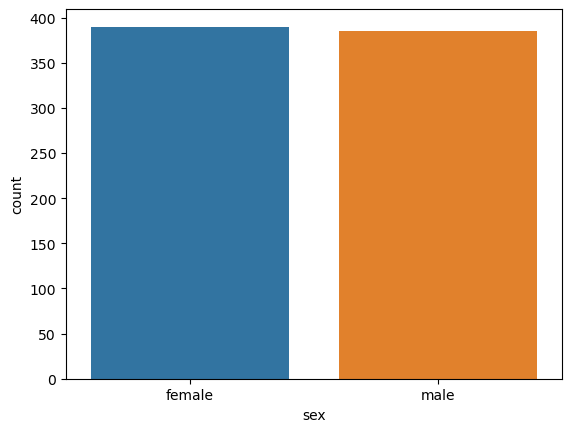

In [11]:
sns.countplot(x='sex', data=df)


<Axes: xlabel='region', ylabel='count'>

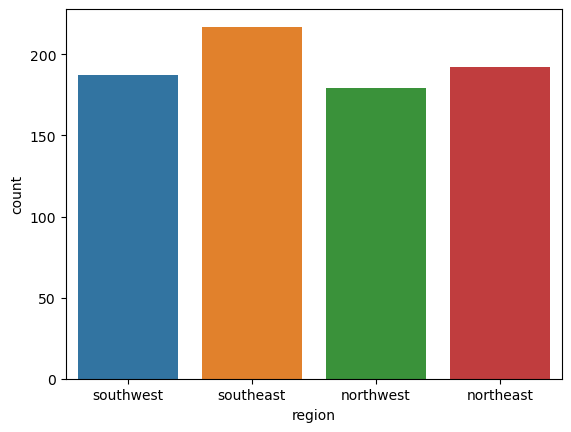

In [12]:
sns.countplot(x='region', data=df)

<Axes: xlabel='smoker', ylabel='count'>

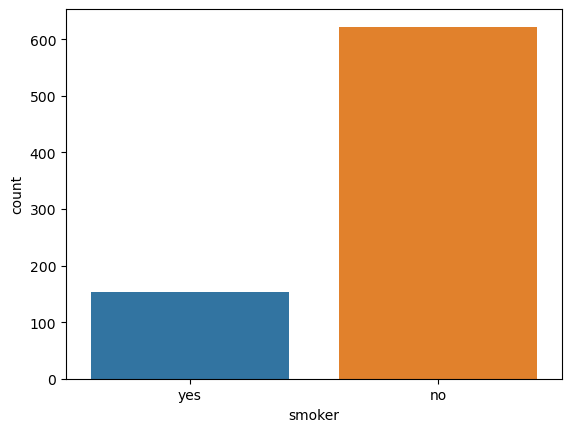

In [13]:
sns.countplot(x='smoker', data=df)

we will convert these 4 categorical data into numerical values to get the proper calculations


In [14]:
df['sex'] = df['sex'].map({'male':1, 'female':0})

In [15]:
df['sex']

0      0
1      1
2      1
3      1
4      1
      ..
770    1
771    0
772    0
773    0
774    1
Name: sex, Length: 775, dtype: int64

In [16]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
770,61,1,36.100,3,no,southwest,27941.28758
771,53,0,26.700,2,no,southwest,11150.78000
772,44,0,36.480,0,no,northeast,12797.20962
773,19,0,28.880,0,yes,northwest,17748.50620


In [17]:
df['region'] = df['region'].map({'southeast': 1, 'northeast': 2, 'southwest':3, 'northwest': 4 })

In [18]:
df['region']

0      3
1      1
2      1
3      4
4      4
      ..
770    3
771    3
772    2
773    4
774    4
Name: region, Length: 775, dtype: int64

In [19]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [20]:
df['smoker']

0      1
1      0
2      0
3      0
4      0
      ..
770    0
771    0
772    0
773    1
774    0
Name: smoker, Length: 775, dtype: int64

In [21]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,39.663226,0.496774,30.968645,1.074839,0.197419,2.423226,13297.241215
std,14.295294,0.500312,5.981360,1.186520,0.398309,1.125912,12118.185350
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1136.399400
25%,27.000000,0.000000,26.730000,0.000000,0.000000,1.000000,4752.353400
50%,40.000000,0.000000,30.780000,1.000000,0.000000,2.000000,9504.310300
75%,52.000000,1.000000,35.200000,2.000000,0.000000,3.000000,16582.138605
max,64.000000,1.000000,49.060000,5.000000,1.000000,4.000000,63770.428010


In [22]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
770,61,1,36.100,3,0,3,27941.28758
771,53,0,26.700,2,0,3,11150.78000
772,44,0,36.480,0,0,2,12797.20962
773,19,0,28.880,0,1,4,17748.50620


<Axes: >

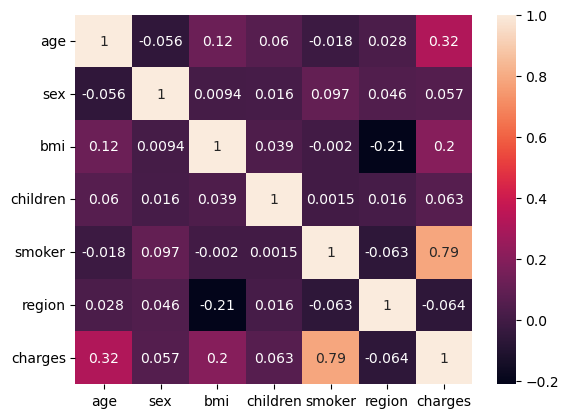

In [23]:
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='children', ylabel='count'>

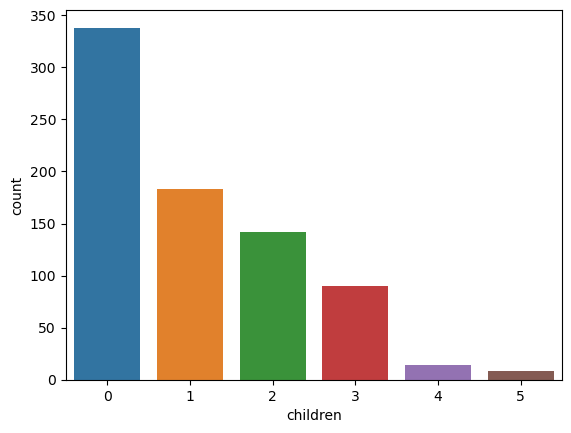

In [24]:
sns.countplot(x='children', data=df)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775 entries, 0 to 774
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       775 non-null    int64  
 1   sex       775 non-null    int64  
 2   bmi       775 non-null    float64
 3   children  775 non-null    int64  
 4   smoker    775 non-null    int64  
 5   region    775 non-null    int64  
 6   charges   775 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 42.5 KB


now we can see all datatypes are numerical so we can start train and test process  

In [31]:
X = df.drop(['charges'], axis=1)
Y = df.charges

In [32]:
X


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4
...,...,...,...,...,...,...
770,61,1,36.100,3,0,3
771,53,0,26.700,2,0,3
772,44,0,36.480,0,0,2
773,19,0,28.880,0,1,4


In [33]:
print(Y)

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
770    27941.28758
771    11150.78000
772    12797.20962
773    17748.50620
774     7261.74100
Name: charges, Length: 775, dtype: float64


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shpae: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (542, 6)
X_test shape:  (233, 6)
y_train shpae:  (542,)
y_test shape:  (233,)


In [35]:
lm = LinearRegression()

In [36]:
lm.fit(X_train, y_train)
pred = lm.predict(X_test)

In [37]:
from sklearn.metrics import r2_score

In [38]:
print("R2 score: ",(r2_score(y_test, pred)))

R2 score:  0.8133132597012624
